In [1]:
import os
import math

import matplotlib
import numpy as np
import sys
import scipy
import yaml

from sklearn.metrics import mean_squared_error

sys.path.append('../')
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from matplotlib import cm

from slow_reservoir.models.simple_rnn import RNNSimple, RNNSimpleTrainableAlpha
from slow_reservoir.dataset.dynamic_state_random import State

%matplotlib inline

In [2]:
config_path = '../slow_reservoir/trained_model/dynamic_state_random/20220623_simple_fast/20220623_simple_fast.cfg'
with open(config_path, 'r') as f:
    cfg = yaml.safe_load(f)
    

model_name = os.path.splitext(os.path.basename(config_path))[0]
print('model_name: ', model_name)

torch.manual_seed(1)
device = torch.device('cpu')

model = RNNSimpleTrainableAlpha(
    n_in=cfg['DATALOADER']['INPUT_NEURON'],
    n_out=1,
    n_hid=cfg['MODEL']['SIZE'],
    device=device,
    sigma_neu=cfg['MODEL']['SIGMA_NEU'],
).to(device)

alpha_list = np.zeros(200*11)
for i in range(11):
    model_path = f'../slow_reservoir/trained_model/dynamic_state_random/{model_name}/epoch_{1000+i*100}.pth'
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    
    alpha_list[i*200: (i+1)*200] = model.alpha.detach().numpy()


model_name:  20220623_simple_fast


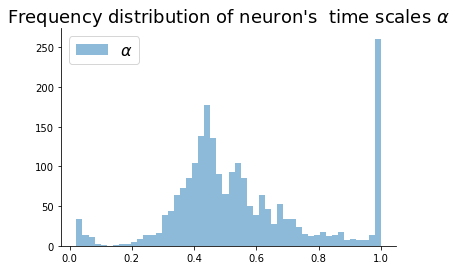

In [3]:
plt.hist(alpha_list, bins=50, alpha=0.5, label=r'$\alpha$')

plt.legend(fontsize=16)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

plt.title(r"Frequency distribution of neuron's  time scales $\alpha$", fontsize=18)
plt.show()

In [4]:
config_path = '../slow_reservoir/trained_model/dynamic_state_random/20220623_simple_middle/20220623_simple_middle.cfg'
with open(config_path, 'r') as f:
    cfg = yaml.safe_load(f)
    

model_name = os.path.splitext(os.path.basename(config_path))[0]
print('model_name: ', model_name)

torch.manual_seed(1)
device = torch.device('cpu')

model = RNNSimpleTrainableAlpha(
    n_in=cfg['DATALOADER']['INPUT_NEURON'],
    n_out=1,
    n_hid=cfg['MODEL']['SIZE'],
    device=device,
    sigma_neu=cfg['MODEL']['SIGMA_NEU'],
).to(device)

alpha_list = np.zeros(200*11)
for i in range(11):
    model_path = f'../slow_reservoir/trained_model/dynamic_state_random/{model_name}/epoch_{1000+i*100}.pth'
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    
    alpha_list[i*200: (i+1)*200] = model.alpha.detach().numpy()


model_name:  20220623_simple_middle


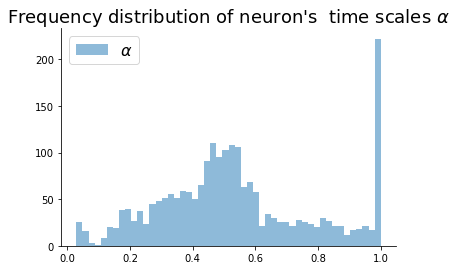

In [5]:
plt.hist(alpha_list, bins=50, alpha=0.5, label=r'$\alpha$')

plt.legend(fontsize=16)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

plt.title(r"Frequency distribution of neuron's  time scales $\alpha$", fontsize=18)
plt.show()

In [6]:
config_path = '../slow_reservoir/trained_model/dynamic_state_random/20220623_simple_slow/20220623_simple_slow.cfg'
with open(config_path, 'r') as f:
    cfg = yaml.safe_load(f)
    

model_name = os.path.splitext(os.path.basename(config_path))[0]
print('model_name: ', model_name)

torch.manual_seed(1)
device = torch.device('cpu')

model = RNNSimpleTrainableAlpha(
    n_in=cfg['DATALOADER']['INPUT_NEURON'],
    n_out=1,
    n_hid=cfg['MODEL']['SIZE'],
    device=device,
    sigma_neu=cfg['MODEL']['SIGMA_NEU'],
).to(device)

alpha_list = np.zeros(200*11)
for i in range(11):
    model_path = f'../slow_reservoir/trained_model/dynamic_state_random/{model_name}/epoch_{1000+i*100}.pth'
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    
    alpha_list[i*200: (i+1)*200] = model.alpha.detach().numpy()


model_name:  20220623_simple_slow


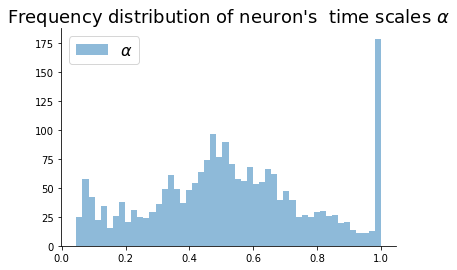

In [7]:
plt.hist(alpha_list, bins=50, alpha=0.5, label=r'$\alpha$')

plt.legend(fontsize=16)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

plt.title(r"Frequency distribution of neuron's  time scales $\alpha$", fontsize=18)
plt.show()

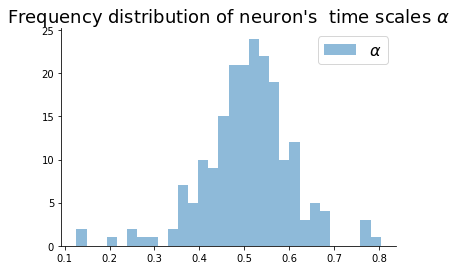

In [8]:
model_path = f'../slow_reservoir/trained_model/dynamic_state_random/{model_name}/epoch_100.pth'
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

plt.hist(model.alpha.detach().numpy(), bins=30, alpha=0.5, label=r'$\alpha$')

plt.legend(fontsize=16)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

plt.title(r"Frequency distribution of neuron's  time scales $\alpha$", fontsize=18)
plt.show()

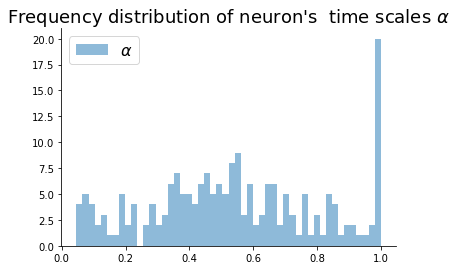

In [9]:
model_path = f'../slow_reservoir/trained_model/dynamic_state_random/{model_name}/epoch_2000.pth'
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

plt.hist(model.alpha.detach().numpy(), bins=50, alpha=0.5, label=r'$\alpha$')

plt.legend(fontsize=16)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

plt.title(r"Frequency distribution of neuron's  time scales $\alpha$", fontsize=18)
plt.show()

In [10]:
config_path = '../slow_reservoir/trained_model/dynamic_state_random/20220623_simple_stable/20220623_simple_stable.cfg'
with open(config_path, 'r') as f:
    cfg = yaml.safe_load(f)
    

model_name = os.path.splitext(os.path.basename(config_path))[0]
print('model_name: ', model_name)

torch.manual_seed(1)
device = torch.device('cpu')

model = RNNSimpleTrainableAlpha(
    n_in=cfg['DATALOADER']['INPUT_NEURON'],
    n_out=1,
    n_hid=cfg['MODEL']['SIZE'],
    device=device,
    sigma_neu=cfg['MODEL']['SIGMA_NEU'],
).to(device)

alpha_list = np.zeros(200*11)
for i in range(11):
    model_path = f'../slow_reservoir/trained_model/dynamic_state_random/{model_name}/epoch_{1000+i*100}.pth'
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    
    alpha_list[i*200: (i+1)*200] = model.alpha.detach().numpy()


model_name:  20220623_simple_stable


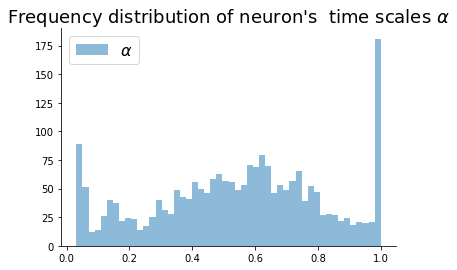

In [11]:
plt.hist(alpha_list, bins=50, alpha=0.5, label=r'$\alpha$')

plt.legend(fontsize=16)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

plt.title(r"Frequency distribution of neuron's  time scales $\alpha$", fontsize=18)
plt.show()

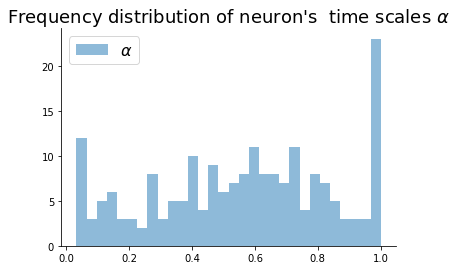

In [12]:
model_path = f'../slow_reservoir/trained_model/dynamic_state_random/{model_name}/epoch_1900.pth'
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

plt.hist(model.alpha.detach().numpy(), bins=30, alpha=0.5, label=r'$\alpha$')

plt.legend(fontsize=16)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

plt.title(r"Frequency distribution of neuron's  time scales $\alpha$", fontsize=18)
plt.show()

In [13]:
config_path = '../slow_reservoir/trained_model/dynamic_state_random/20220623_simple_slow_long_epoch/20220623_simple_slow_long_epoch.cfg'
with open(config_path, 'r') as f:
    cfg = yaml.safe_load(f)
    

model_name = os.path.splitext(os.path.basename(config_path))[0]
print('model_name: ', model_name)

torch.manual_seed(1)
device = torch.device('cpu')

model = RNNSimpleTrainableAlpha(
    n_in=cfg['DATALOADER']['INPUT_NEURON'],
    n_out=1,
    n_hid=cfg['MODEL']['SIZE'],
    device=device,
    sigma_neu=cfg['MODEL']['SIGMA_NEU'],
).to(device)

model_path = f'../slow_reservoir/trained_model/dynamic_state_random/{model_name}/epoch_5000.pth'
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()


model_name:  20220623_simple_slow_long_epoch


RNNSimpleTrainableAlpha(
  (w_in): Linear(in_features=100, out_features=200, bias=True)
  (w_hh): Linear(in_features=200, out_features=200, bias=True)
  (w_out): Linear(in_features=200, out_features=1, bias=True)
)

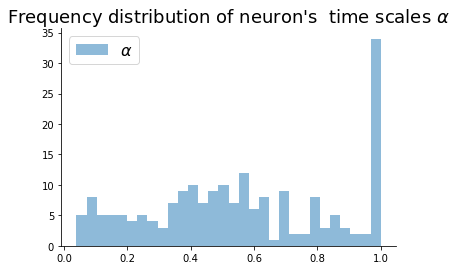

In [14]:
plt.hist(model.alpha.detach().numpy(), bins=30, alpha=0.5, label=r'$\alpha$')

plt.legend(fontsize=16)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

plt.title(r"Frequency distribution of neuron's  time scales $\alpha$", fontsize=18)
plt.show()

model_name:  20220623_simple_slow_long_epoch_small


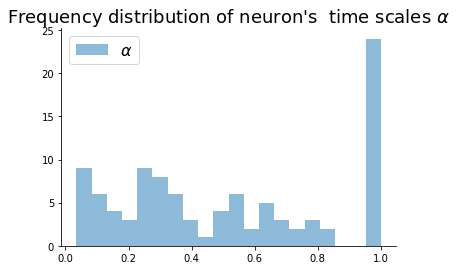

In [15]:
config_path = '../slow_reservoir/trained_model/dynamic_state_random/20220623_simple_slow_long_epoch_small/20220623_simple_slow_long_epoch_small.cfg'
with open(config_path, 'r') as f:
    cfg = yaml.safe_load(f)
    

model_name = os.path.splitext(os.path.basename(config_path))[0]
print('model_name: ', model_name)

torch.manual_seed(1)
device = torch.device('cpu')

model = RNNSimpleTrainableAlpha(
    n_in=cfg['DATALOADER']['INPUT_NEURON'],
    n_out=1,
    n_hid=cfg['MODEL']['SIZE'],
    device=device,
    sigma_neu=cfg['MODEL']['SIGMA_NEU'],
).to(device)

alpha_list = np.zeros(100*21)
for i in range(21):
    model_path = f'../slow_reservoir/trained_model/dynamic_state_random/{model_name}/epoch_{8000+i*100}.pth'
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    
    alpha_list[i*100: (i+1)*100] = model.alpha.detach().numpy()

plt.hist(model.alpha.detach().numpy(), bins=20, alpha=0.5, label=r'$\alpha$')

plt.legend(fontsize=16)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

plt.title(r"Frequency distribution of neuron's  time scales $\alpha$", fontsize=18)
plt.show()


model_name:  20220623_simple_slow_size_80


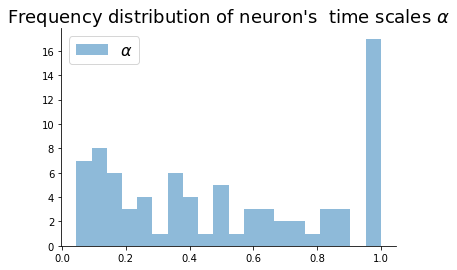

In [16]:
config_path = '../slow_reservoir/trained_model/dynamic_state_random/20220623_simple_slow_size_80/20220623_simple_slow_size_80.cfg'
with open(config_path, 'r') as f:
    cfg = yaml.safe_load(f)
    

model_name = os.path.splitext(os.path.basename(config_path))[0]
print('model_name: ', model_name)

torch.manual_seed(1)
device = torch.device('cpu')

model = RNNSimpleTrainableAlpha(
    n_in=cfg['DATALOADER']['INPUT_NEURON'],
    n_out=1,
    n_hid=cfg['MODEL']['SIZE'],
    device=device,
    sigma_neu=cfg['MODEL']['SIGMA_NEU'],
).to(device)

alpha_list = np.zeros(80*11)
for i in range(11):
    model_path = f'../slow_reservoir/trained_model/dynamic_state_random/{model_name}/epoch_{9000+i*100}.pth'
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    
    alpha_list[i*80: (i+1)*80] = model.alpha.detach().numpy()

plt.hist(model.alpha.detach().numpy(), bins=20, alpha=0.5, label=r'$\alpha$')

plt.legend(fontsize=16)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

plt.title(r"Frequency distribution of neuron's  time scales $\alpha$", fontsize=18)
plt.show()


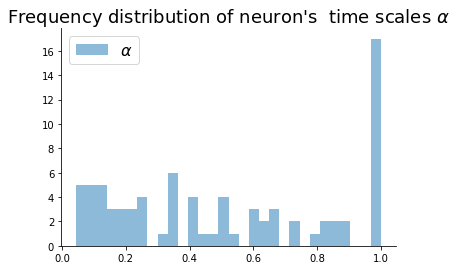

In [17]:
plt.hist(model.alpha.detach().numpy(), bins=30, alpha=0.5, label=r'$\alpha$')

plt.legend(fontsize=16)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

plt.title(r"Frequency distribution of neuron's  time scales $\alpha$", fontsize=18)
plt.show()

model_name:  20220623_simple_slow_size_80


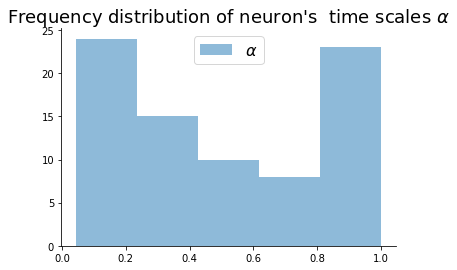

In [29]:
config_path = '../slow_reservoir/trained_model/dynamic_state_random/20220623_simple_slow_size_80/20220623_simple_slow_size_80.cfg'
with open(config_path, 'r') as f:
    cfg = yaml.safe_load(f)
    

model_name = os.path.splitext(os.path.basename(config_path))[0]
print('model_name: ', model_name)

torch.manual_seed(1)
device = torch.device('cpu')

model = RNNSimpleTrainableAlpha(
    n_in=cfg['DATALOADER']['INPUT_NEURON'],
    n_out=1,
    n_hid=cfg['MODEL']['SIZE'],
    device=device,
    sigma_neu=cfg['MODEL']['SIGMA_NEU'],
).to(device)

model_path = f'../slow_reservoir/trained_model/dynamic_state_random/{model_name}/epoch_10000.pth'
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

plt.hist(model.alpha.detach().numpy(), bins=5, alpha=0.5, label=r'$\alpha$')

plt.legend(fontsize=16)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

plt.title(r"Frequency distribution of neuron's  time scales $\alpha$", fontsize=18)
plt.show()


In [25]:
slow_ids = (model.alpha.detach().numpy() < 0.2).nonzero()[0]

In [26]:
slow_ids

array([ 2,  7,  8, 11, 14, 15, 16, 20, 21, 22, 37, 45, 57, 59, 60, 63, 67,
       68, 69, 70, 74])

In [27]:
fast_ids = (model.alpha.detach().numpy() > 0.8).nonzero()[0]

In [28]:
fast_ids

array([ 0,  4,  5,  6, 28, 29, 31, 32, 33, 34, 35, 38, 39, 42, 43, 44, 48,
       49, 56, 64, 66, 77, 79])